In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn import *

In [2]:
df = pd.read_csv('../../../data/Clean_data.csv')

In [3]:
df = df.dropna()
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,-160.0,0.0,2014.0,1.0,0.0,0.0,0.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0.0,3.0,7.0,...,1.0,0.0,0.0,880.0,-397.0,2014.0,0.0,0.0,0.0,1.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
3,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0.0,5.0,7.0,...,1.0,0.0,0.0,600.0,0.0,2014.0,0.0,0.0,0.0,1.0
4,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0.0,3.0,8.0,...,0.0,0.0,0.0,-120.0,577.0,2015.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21414,700000.0,3.0,2.50,2230.0,4006.0,2.0,0,0.0,3.0,8.0,...,1.0,0.0,0.0,0.0,-174.0,2015.0,0.0,1.0,0.0,0.0
21415,800000.0,4.0,3.25,3540.0,159430.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,1600.0,-232610.0,2014.0,0.0,0.0,0.0,1.0
21416,899000.0,4.0,3.50,2490.0,5500.0,2.0,0,0.0,3.0,9.0,...,1.0,0.0,0.0,780.0,0.0,2015.0,0.0,0.0,1.0,0.0
21417,465750.0,3.0,2.50,2670.0,4534.0,2.0,0,0.0,3.0,9.0,...,0.0,0.0,0.0,-370.0,-545.0,2014.0,0.0,0.0,0.0,1.0


In [4]:
df2 = df[df["grade"] <= 6]
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
25,233000.0,3.0,2.00,1710.0,4697.0,1.5,0,0.0,5.0,6.0,...,0.0,0.0,0.0,680.0,-8.0,2014.0,1.0,0.0,0.0,0.0
36,550000.0,4.0,1.00,1660.0,34848.0,1.0,0,0.0,1.0,5.0,...,1.0,0.0,0.0,-500.0,23381.0,2014.0,0.0,1.0,0.0,0.0
44,309000.0,3.0,1.00,1280.0,9656.0,1.0,0,0.0,4.0,6.0,...,0.0,0.0,0.0,-60.0,848.0,2014.0,0.0,0.0,1.0,0.0
46,210490.0,3.0,1.00,990.0,8528.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-238.0,-312.0,2015.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20379,395000.0,2.0,1.00,700.0,7457.0,1.0,0,0.0,3.0,6.0,...,1.0,0.0,0.0,-800.0,327.0,2015.0,0.0,0.0,1.0,0.0
20946,110000.0,2.0,1.00,828.0,4524.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,-878.0,2015.0,0.0,0.0,1.0,0.0
20953,193000.0,2.0,1.75,910.0,2550.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-400.0,0.0,2015.0,0.0,0.0,1.0,0.0
21027,375000.0,1.0,1.00,720.0,3166.0,1.0,0,0.0,3.0,6.0,...,1.0,0.0,0.0,-420.0,-3084.0,2014.0,1.0,0.0,0.0,0.0


In [5]:
df2

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,Seattle,Snoqualmie,Woodinville,sqft_living_diff,sqft_lot_diff,year,x0_fall,x0_spring,x0_summer,x0_winter
2,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-1950.0,1938.0,2015.0,0.0,0.0,0.0,1.0
25,233000.0,3.0,2.00,1710.0,4697.0,1.5,0,0.0,5.0,6.0,...,0.0,0.0,0.0,680.0,-8.0,2014.0,1.0,0.0,0.0,0.0
36,550000.0,4.0,1.00,1660.0,34848.0,1.0,0,0.0,1.0,5.0,...,1.0,0.0,0.0,-500.0,23381.0,2014.0,0.0,1.0,0.0,0.0
44,309000.0,3.0,1.00,1280.0,9656.0,1.0,0,0.0,4.0,6.0,...,0.0,0.0,0.0,-60.0,848.0,2014.0,0.0,0.0,1.0,0.0
46,210490.0,3.0,1.00,990.0,8528.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-238.0,-312.0,2015.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20379,395000.0,2.0,1.00,700.0,7457.0,1.0,0,0.0,3.0,6.0,...,1.0,0.0,0.0,-800.0,327.0,2015.0,0.0,0.0,1.0,0.0
20946,110000.0,2.0,1.00,828.0,4524.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,0.0,-878.0,2015.0,0.0,0.0,1.0,0.0
20953,193000.0,2.0,1.75,910.0,2550.0,1.0,0,0.0,3.0,6.0,...,0.0,0.0,0.0,-400.0,0.0,2015.0,0.0,0.0,1.0,0.0
21027,375000.0,1.0,1.00,720.0,3166.0,1.0,0,0.0,3.0,6.0,...,1.0,0.0,0.0,-420.0,-3084.0,2014.0,1.0,0.0,0.0,0.0


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 2 to 21316
Data columns (total 47 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2254 non-null   float64
 1   bedrooms          2254 non-null   float64
 2   bathrooms         2254 non-null   float64
 3   sqft_living       2254 non-null   float64
 4   sqft_lot          2254 non-null   float64
 5   floors            2254 non-null   float64
 6   waterfront        2254 non-null   int64  
 7   view              2254 non-null   float64
 8   condition         2254 non-null   float64
 9   grade             2254 non-null   float64
 10  sqft_above        2254 non-null   float64
 11  basement          2254 non-null   int64  
 12  yr_built          2254 non-null   float64
 13  yr_renovated      2254 non-null   float64
 14  zipcode           2254 non-null   float64
 15  lat               2254 non-null   float64
 16  long              2254 non-null   float64

In [7]:
df2 = df2.drop('Medina', 1)

In [8]:
df2['grade'].value_counts()

6.0    1993
5.0     233
4.0      27
3.0       1
Name: grade, dtype: int64

In [9]:
X = df2.drop(['price'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

base_lr = LinearRegression()
base_lr.fit(X_train,y_train)

kcross_base = cross_val_score(base_lr,X_train,y_train,cv=5)

kcross_base

array([0.49126693, 0.55786467, 0.51579226, 0.49617367, 0.46287396])

In [10]:
base_lr.score(X,y)

0.5347194014261016

In [11]:
X = df2.drop(['price'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

fit_lr = LinearRegression()
fit_lr.fit(X_train,y_train)

kcross_fit = cross_val_score(fit_lr,X_train,y_train,cv=5)

kcross_fit

array([0.49039642, 0.55675342, 0.516401  , 0.49612228, 0.46291765])

In [12]:
fit_lr.score(X_train,y_train)

0.5626897795914065

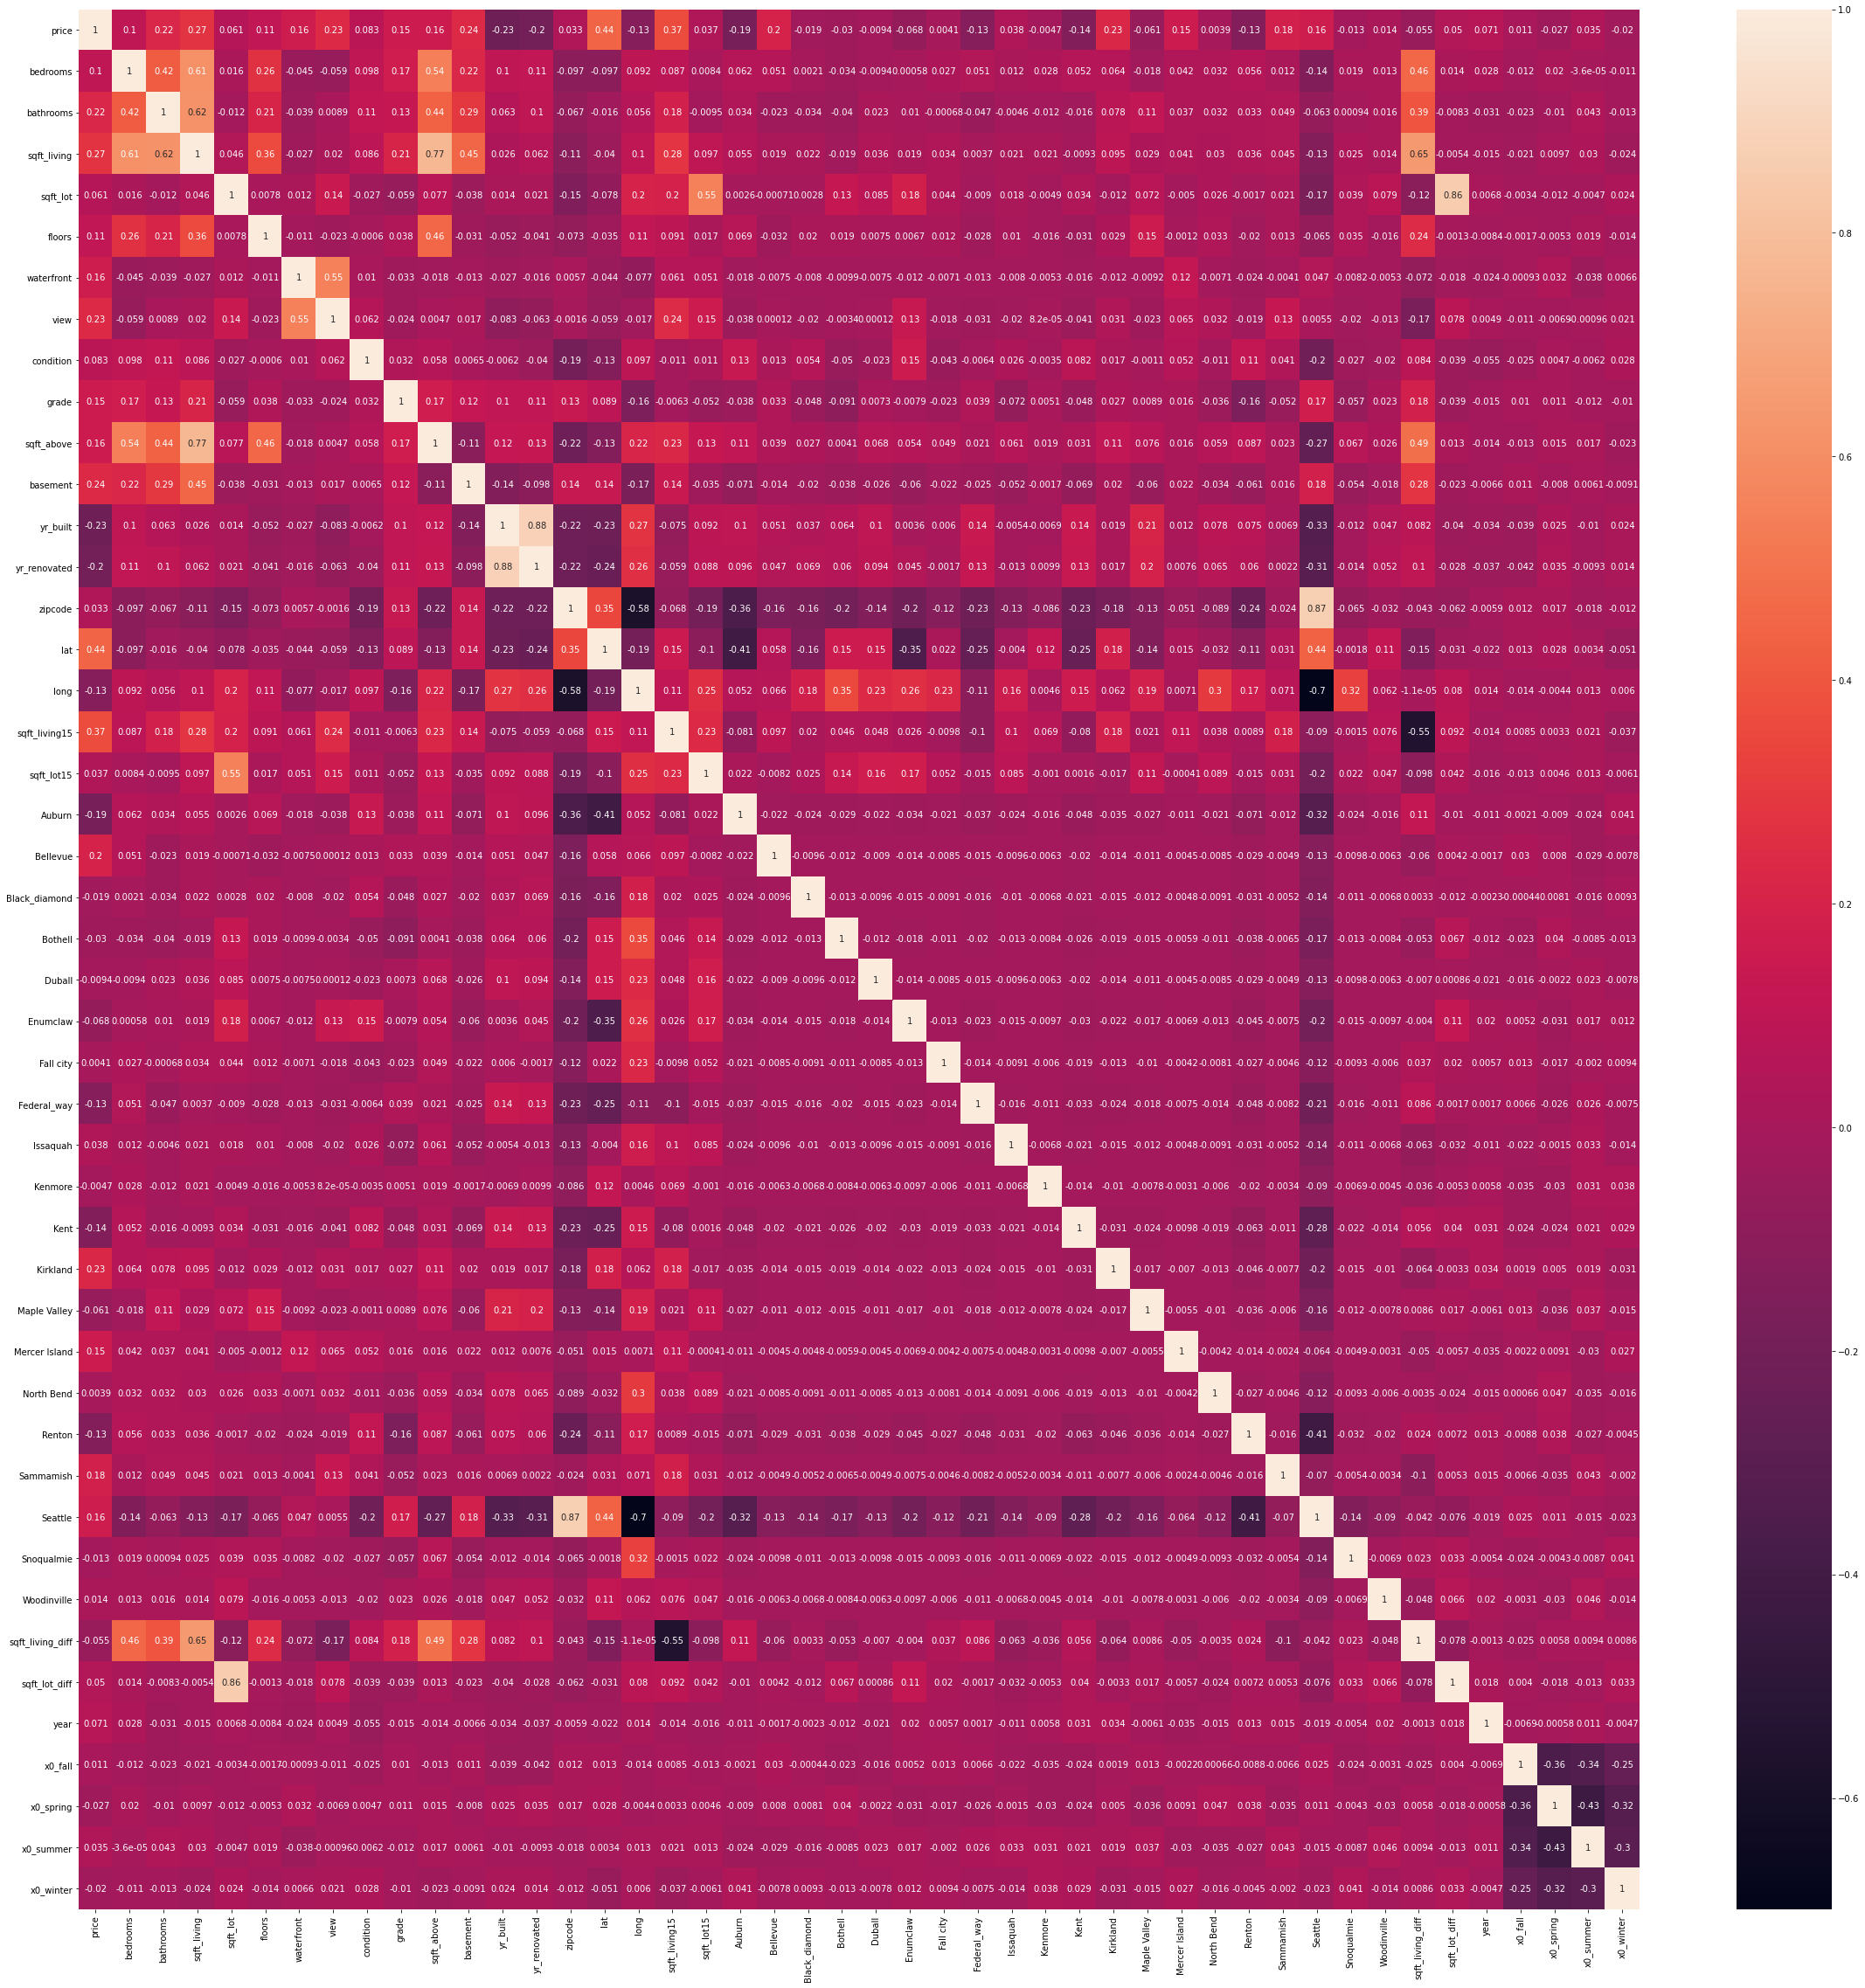

In [13]:
fig, ax = plt.subplots(figsize=(40,40))    
sns.heatmap(df2.corr(), annot=True);

In [40]:
X = df2.drop(['price'],axis =1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=22)
select.fit(X=X, y=df2['price'])
list(zip(df2.columns,select.support_))

[('price', False),
 ('bedrooms', False),
 ('bathrooms', False),
 ('sqft_living', True),
 ('sqft_lot', False),
 ('floors', False),
 ('waterfront', False),
 ('view', False),
 ('condition', False),
 ('grade', False),
 ('sqft_above', False),
 ('basement', False),
 ('yr_built', False),
 ('yr_renovated', False),
 ('zipcode', False),
 ('lat', False),
 ('long', False),
 ('sqft_living15', True),
 ('sqft_lot15', True),
 ('Auburn', True),
 ('Bellevue', True),
 ('Black_diamond', True),
 ('Bothell', True),
 ('Duball', True),
 ('Enumclaw', False),
 ('Fall city', True),
 ('Federal_way', True),
 ('Issaquah', False),
 ('Kenmore', True),
 ('Kent', True),
 ('Kirkland', True),
 ('Maple Valley', True),
 ('Mercer Island', False),
 ('North Bend', True),
 ('Renton', True),
 ('Sammamish', True),
 ('Seattle', True),
 ('Snoqualmie', True),
 ('Woodinville', False),
 ('sqft_living_diff', True),
 ('sqft_lot_diff', False),
 ('year', False),
 ('x0_fall', True),
 ('x0_spring', True),
 ('x0_summer', False)]

In [57]:
X = df2.drop(['price','x0_fall','x0_spring'], axis=1)
y = df2.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

drop_1_lr = LinearRegression()
drop_1_lr.fit(X_train,y_train)

kcross_drop_1 = cross_val_score(drop_1_lr,X_train,y_train,cv=5)

kcross_drop_1

array([0.4929215 , 0.55914691, 0.51713427, 0.4952521 , 0.46147125])

In [58]:
drop_1_lr.score(X_train,y_train)

0.5621501778823108

In [56]:
0.5621501778823108

0.5621501778823108

In [52]:
X = df.drop(['price','x0_fall','x0_spring'], axis=1)
y = df[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_scale = StandardScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

y_scale_lr = LinearRegression()
y_scale_lr.fit(X_train,y_train)

kcross_y_scale = cross_val_score(y_scale_lr,X_train,y_train,cv=5)

print(kcross_y_scale)
print(y_scale_lr.score(X_train,y_train))

[0.75139675 0.75672193 0.74780806 0.75343686 0.73764806]
0.7525141484727019


In [53]:
y_scale_lr.score(X_train,y_train)

0.7525141484727019

In [ ]:
0.7525132223336898